In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Use the HEALPY routines.
import healpy as hp

The CMB map requires the (linear theory) power spectrum.  To get the power spectrum as a function of scale ($\ell$) we typically use a Boltzmann code, such as [CAMB](https://github.com/cmbant/CAMB) or [CLASS](https://github.com/lesgourg/class_public).  Below I will use CLASS as an example.

In [3]:
from classy import Class

In [5]:
# We'll ask for CMB temperature anisotropy spectra, lensed spectra and matter P(k):
params = {
    'output': 'tCl',
    'l_max_scalars': 5000,
    'lensing': 'no',
    'A_s': np.exp(3.040)*1e-10,
    'n_s': 0.96824,
    'h': 0.6770,
    'N_ur': 2.0328,
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'tau_reio': 0.0568,
    'omega_b': 0.022447,
    'omega_cdm': 0.11923}  
# Create an instance of the CLASS wrapper and set the parameters.
cosmo = Class()
cosmo.set(params)
# Run the whole code.  It should take a few seconds to run.
cosmo.compute()
# Get (unlensed) C_l^{TT}, convert to uK:
cls = cosmo.raw_cl(5000)
clTT = cls['tt'] * (2.7255e6)**2

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


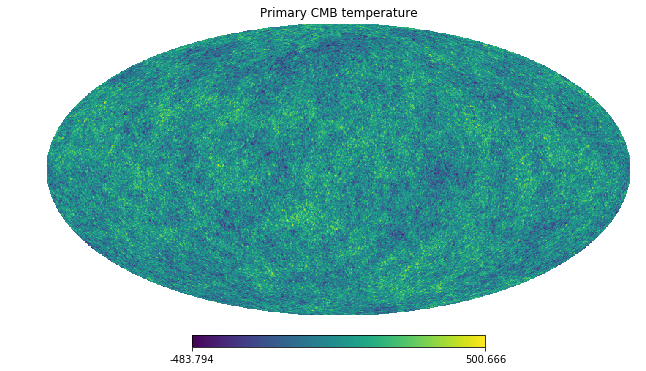

In [9]:
# Generate a CMB map and the a_{lm} coefficients as well.
nside = 512
map_primary, alm_primary = hp.sphtfunc.synfast(clTT,nside,alm=True,new=True)
hp.visufunc.mollview(map_primary,title='Primary CMB temperature')